In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
metrics = pd.read_csv(r'/Users/saskiad/Documents/Data/Openscope_Multiplex_trim/analysis/tf/metrics_all.csv')

In [3]:
rf_path = r'/Users/saskiad/Documents/Data/Openscope_Multiplex_trim/analysis/RF/new_rf/overlapping_index_all_sessions.npy'

In [4]:
rfs = np.load(rf_path, allow_pickle=True)

In [7]:
rfs.item().keys()

dict_keys(['ON', 'OFF', 'Sessions'])

In [79]:
rfs.item()['ON']

[[1.0,
  1.0,
  nan,
  0.9594941730392555,
  0.8503422533543696,
  0.7254627304893954,
  nan,
  0.8044069187298661,
  0.6824860576563896,
  1.0,
  0.908285674292563,
  1.0,
  1.0,
  nan],
 [nan,
  nan,
  nan,
  nan,
  0.5637767435339869,
  nan,
  nan,
  0.49127624275853893,
  nan,
  0.9212542188090274,
  nan,
  nan,
  1.0,
  nan,
  1.0,
  nan,
  nan,
  nan,
  nan,
  0.9137866261045419,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0.863321,
  nan,
  1.0,
  0.9298673041907805,
  nan,
  nan,
  nan,
  0.5227020548924085,
  nan,
  0.768423,
  nan,
  nan,
  0.863321,
  nan,
  1.0,
  nan,
  0.6567816707675705,
  1.0,
  0.768423,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0.8590639449020887,
  nan,
  nan,
  0.045199,
  1.0,
  0.745866465119983,
  0.711973549751946,
  1.0,
  nan,
  0.571504,
  nan,
  nan,
  0.9441393323433834,
  0.0,
  nan,
  0.8938212364676656,
  0.6858684479075399,
  nan,
  0.9230087793517028,
  nan,
  nan,
  nan,
  0.7994514717384311,
  0.0,
  1.0,
  0.303184,
  0.310

In [9]:
temp=rfs.item()

In [10]:
df = pd.DataFrame(temp)

In [80]:
for index, row in df.iterrows():
    if row.Sessions.split(' ')[-1] == 'CS)':
        session_id = int(row.Sessions.split(' ')[-2].split('(')[-1].split(',')[0])
        subset = metrics[metrics.session_id==session_id]
        subset['ON'] = row.ON
        subset['OFF'] = row.OFF
        if index==0:
            metrics_rf = subset.copy()
        else:
            metrics_rf = metrics_rf.append(subset)

/Users/saskiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/saskiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
metrics_rf.shape

(4023, 29)

In [14]:
metrics_rf.head()

,Unnamed: 0,cell_index,center_dir,center_tf,center_osi,center_dsi,iso,ortho,suppression_strength,suppression_tuning,...,ortho_mean,ortho_std,cell_id,session_id,valid,cre,area,depth,ON,OFF
470,0,0,6,0,0.164565,0.066385,-0.329955,-0.468295,-3.543600,-0.317434,...,0.023837,0.023656,1010599617,1010436210,False,Sst:Ai148,VISp,195,1.000000,0.907454
471,1,1,0,0,0.074823,0.275595,0.234142,-0.233675,-0.157110,-12.140546,...,0.109795,0.043551,1010599618,1010436210,False,Sst:Ai148,VISp,195,1.000000,0.669674
472,2,2,2,1,0.681111,0.080146,-1.062818,-0.530996,13.877293,1.206975,...,0.045285,0.204489,1010599619,1010436210,True,Sst:Ai148,VISp,195,NaN,NaN
473,3,3,1,0,0.120791,0.405271,0.386096,0.118766,0.321257,1.208238,...,0.038727,0.033297,1010599620,1010436210,True,Sst:Ai148,VISp,195,0.959494,0.983400
474,4,4,2,0,0.294952,0.165825,-0.026302,-0.241552,-0.415507,-2.057738,...,0.091613,0.032063,1010599622,1010436210,False,Sst:Ai148,VISp,195,0.850342,0.990296


In [82]:
metrics_rf['responsive'] = False
metrics_rf.ix[metrics_rf.center_percent_trials>0.25, 'responsive'] = True

/Users/saskiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [83]:
metrics_rf.to_csv(r'/Users/saskiad/Documents/Data/Openscope_Multiplex_trim/analysis/tf/metrics_rf.csv')

In [84]:
areas = ['VISp','VISl','VISal']
cres = ['Cux2:Ai93','Rbp4:Ai93','Sst:Ai148']

In [85]:
len(metrics_rf[(metrics_rf.valid)&(metrics_rf.ON>0.8)])

442

In [86]:
len(metrics_rf[(metrics_rf.valid)&(metrics_rf.OFF>0.8)])

438

In [123]:
valid = metrics_rf[metrics_rf.valid]

In [124]:
len(valid)

2453

In [125]:
len(valid[(valid.ON>0.8)|(valid.OFF>0.8)])

646

In [127]:
valid['rf'] = False
valid.ix[valid.ON>0.7, 'rf'] = True
valid.ix[valid.OFF>0.7, 'rf'] = True

/Users/saskiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/saskiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/saskiad/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [128]:
len(valid[valid.rf])

737

In [129]:
len(valid[(valid.responsive)&(valid.rf)])

585

In [130]:
rr = valid[(valid.responsive)&(valid.rf)]

In [131]:
rr[(rr.cre=='Cux2:Ai93')&(rr.area=='VISp')].iso.median()

0.05667505185980942

In [132]:
rr[(rr.cre=='Rbp4:Ai93')&(rr.area=='VISp')].iso.median()

0.2539137060933823

In [133]:
rr[(rr.cre=='Sst:Ai148')&(rr.area=='VISp')].iso.median()

0.34515349108491233

In [134]:
for area in areas:
    for cre in cres:
        print(area, cre, rr[(rr.cre==cre)&(rr.area==area)].iso.mean())

VISp Cux2:Ai93 0.11745774095630969
VISp Rbp4:Ai93 0.23280525200479912
VISp Sst:Ai148 0.3095370708580236
VISl Cux2:Ai93 0.34665623070563945
VISl Rbp4:Ai93 -0.9037322986023433
VISl Sst:Ai148 nan
VISal Cux2:Ai93 0.322815325646758
VISal Rbp4:Ai93 0.6069451322048152
VISal Sst:Ai148 nan


In [99]:
cux2 = valid[(valid.area=='VISp')&(valid.cre=='Cux2:Ai93')&(valid.responsive)]

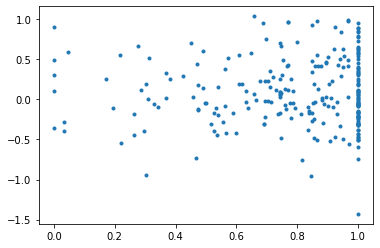

In [100]:
plt.plot(cux2.ON, cux2.iso, '.')

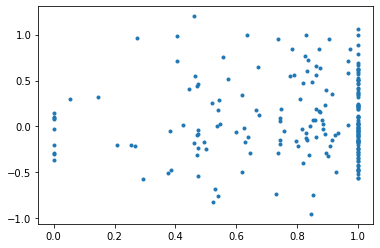

In [101]:
plt.plot(cux2.OFF, cux2.iso, '.')

/Users/saskiad/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/saskiad/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


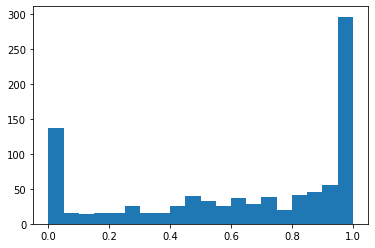

In [102]:
plt.hist(valid.OFF, bins=20);

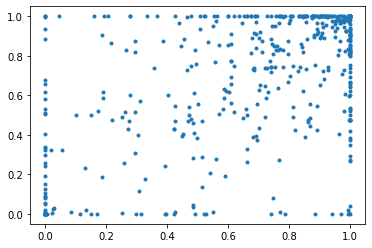

In [103]:
 plt.plot(valid.ON, valid.OFF, '.')

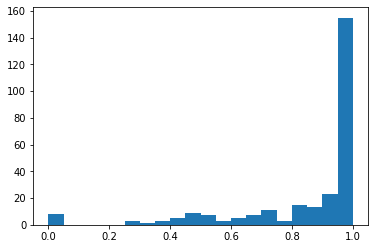

In [104]:
plt.hist(valid[valid.ON>0.8].OFF, bins=20);

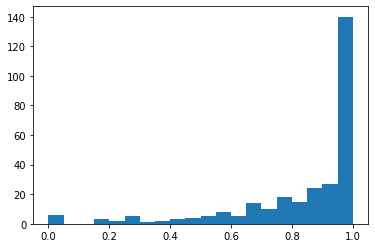

In [105]:
plt.hist(valid[valid.OFF>0.8].ON, bins=20);

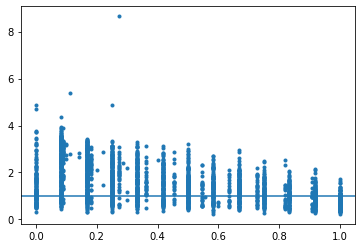

In [106]:
plt.plot(valid.center_percent_trials, valid.center_std/valid.center_mean, '.')
plt.axhline(y=1)

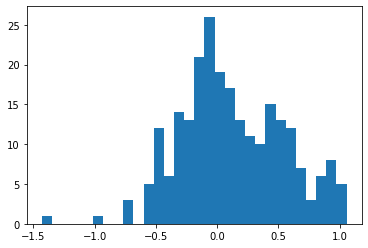

In [107]:
plt.hist(rr[(rr.cre=='Cux2:Ai93')&(rr.area=='VISp')].iso, bins=30);

In [136]:
rr['iso_comp'] = (rr.center_mean - rr.iso_mean)/(rr.center_mean + rr.iso_mean)

/Users/saskiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


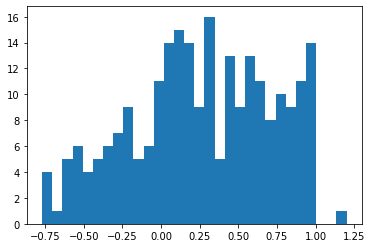

In [109]:
plt.hist(rr[(rr.cre=='Cux2:Ai93')&(rr.area=='VISp')].iso_comp, bins=30);

In [137]:
for area in areas:
    for cre in cres:
        print(area, cre, rr[(rr.cre==cre)&(rr.area==area)].iso.mean(),
             rr[(rr.cre==cre)&(rr.area==area)].iso_comp.mean())

VISp Cux2:Ai93 0.11745774095630969 0.2664701948945202
VISp Rbp4:Ai93 0.23280525200479912 0.40547189492658786
VISp Sst:Ai148 0.3095370708580236 0.38698345740818874
VISl Cux2:Ai93 0.34665623070563945 0.49250928789233783
VISl Rbp4:Ai93 -0.9037322986023433 0.45361625634618713
VISl Sst:Ai148 nan nan
VISal Cux2:Ai93 0.322815325646758 0.4143149050128887
VISal Rbp4:Ai93 0.6069451322048152 0.6793146355525658
VISal Sst:Ai148 nan nan


(-2, 2)

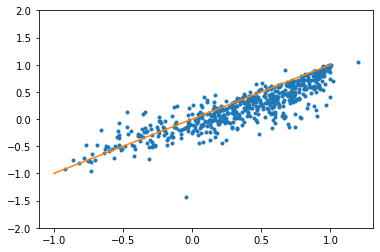

In [139]:
plt.plot(rr.iso_comp, rr.iso, '.')
plt.plot([-1,1],[-1,1])
plt.ylim(-2,2)

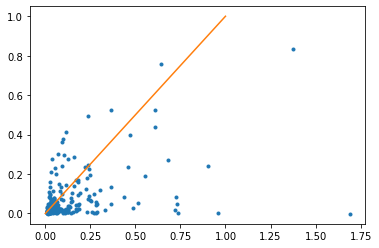

In [112]:
temp = rr[(rr.cre=='Cux2:Ai93')&(rr.area=='VISp')]
plt.plot(temp.center_mean, temp.iso_mean, '.')
plt.plot([0,1], [0,1])

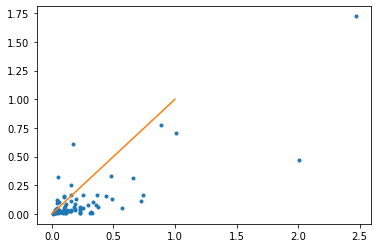

In [113]:
temp = rr[(rr.cre=='Rbp4:Ai93')&(rr.area=='VISp')]
plt.plot(temp.center_mean, temp.iso_mean, '.')
plt.plot([0,1], [0,1])

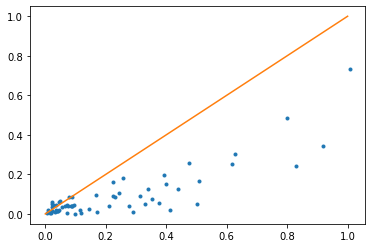

In [140]:
temp = valid[(valid.cre=='Sst:Ai148')&(valid.area=='VISp')&(valid.rf)]
plt.plot(temp.center_mean, temp.iso_mean, '.')
plt.plot([0,1], [0,1])

Text(0, 0.5, 'Ortho')

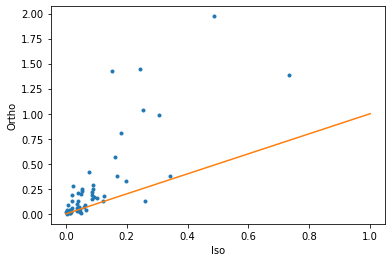

In [141]:
temp = valid[(valid.cre=='Sst:Ai148')&(valid.area=='VISp')&(valid.rf)]
plt.plot(temp.iso_mean, temp.ortho_mean, '.')
plt.plot([0,1], [0,1])
plt.xlabel("Iso")
plt.ylabel("Ortho")

In [76]:
metrics_rf.loc[0]

Unnamed: 0                        0
cell_index                        0
center_dir                        2
center_tf                         0
center_osi                 0.142695
center_dsi                0.0466676
iso                        0.451397
ortho                     -0.210353
suppression_strength     -0.0913985
suppression_tuning           1.0626
cmi                        0.596921
center_mean               0.0817295
center_std                 0.035797
center_percent_trials      0.916667
blank_mean               0.00210341
blank_std                 0.0125288
iso_mean                   0.029718
iso_std                   0.0461919
ortho_mean                0.0927413
ortho_std                 0.0503006
cell_id                  1010599101
session_id               1010368135
valid                         False
cre                       Sst:Ai148
area                           VISp
depth                           150
ON                         0.999902
OFF                        0

### metric for surround response
- where peak of iso
- where peak of ortho
- iso & ortho responses > center response
- peak iso and ortho separated by 90 degrees


In [115]:
to_exclude = 1012847933

In [122]:
metrics_rf = metrics_rf[~metrics_rf.session_id.isin([to_exclude])]

In [120]:
len(metrics_rf)

4023

In [121]:
4023-3570

453

In [148]:
valid[(valid.cre=='Cux2:Ai93')&(valid.area=='VISp')&(valid.rf)&(valid.center_percent_trials>0.5)].iso.mean()

0.184115191925161

In [249]:
cux2 = valid[(valid.cre=='Cux2:Ai93')&(valid.area=='VISp')&(valid.rf)]

In [250]:
for thresh in np.arange(0,1,0.1):
    print(thresh, cux2[cux2.center_percent_trials>thresh].iso.mean())

0.0 0.02419477317159424
0.1 0.04469379336279973
0.2 0.09750813428091808
0.30000000000000004 0.12098991159822006
0.4 0.16046178403590874
0.5 0.184115191925161
0.6000000000000001 0.16895849014897812
0.7000000000000001 0.18999683057770655
0.8 0.2685547658018406
0.9 0.3258581211382507


In [251]:
len(cux2)

300

In [248]:
len(cux2[cux2.center_percent_trials>0.5])

168

Text(0.5, 1.0, 'Cux2 VISp')

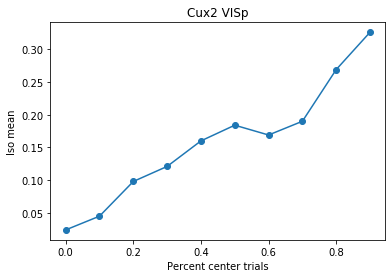

In [217]:
plt.plot(np.arange(0,1,0.1), [0.024, 0.045, 0.098, 0.121, 0.160, 0.184, 0.169, 0.19, 0.269, 0.326], 'o-')
plt.xlabel("Percent center trials")
plt.ylabel("Iso mean")
plt.title("Cux2 VISp")

In [219]:
iso_mean = np.empty((10,3))
for c, cre in enumerate(cres):
    for i,thresh in enumerate(np.arange(0,1,0.1)):
        iso_mean[i,c] = valid[(valid.area=='VISp')&(valid.rf)&(valid.cre==cre)&(valid.center_percent_trials>thresh)].iso.mean()

(0, 0.45)

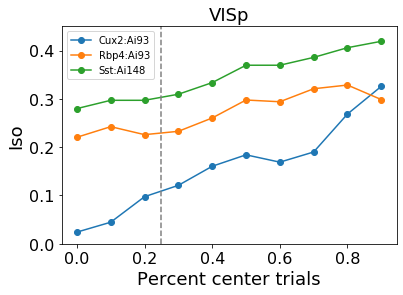

In [240]:
for i in range(3):
    plt.plot(np.arange(0,1,0.1), iso_mean[:,i], 'o-', label=cres[i])
plt.legend()
plt.title("VISp", fontsize=18)
plt.axvline(x=0.25, ls='--', color='gray')
plt.xlabel("Percent center trials", fontsize=18)
plt.ylabel("Iso", fontsize=18)
plt.tick_params(labelsize=16)
plt.ylim(0,0.45)

In [241]:
iso_mean_cv = np.empty((7,3))
for c, cre in enumerate(cres):
    for i,thresh in enumerate([2.5, 2.25, 2, 1.75, 1.5, 1.25, 1]):
        iso_mean_cv[i,c] = valid[(valid.area=='VISp')&(valid.rf)&(valid.cre==cre)&
                                 (valid.center_mean>0.05)&(valid.cv<thresh)].iso.mean()

(0, 0.45)

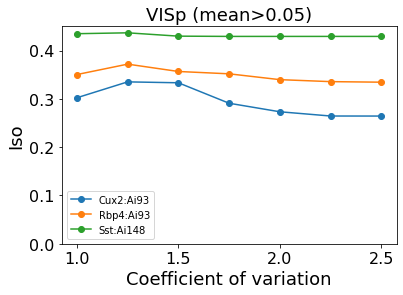

In [243]:
for i in range(3):
    plt.plot([2.5, 2.25, 2, 1.75, 1.5, 1.25, 1], iso_mean_cv[:,i], 'o-', label=cres[i])
plt.legend()
plt.title("VISp (mean>0.05)", fontsize=18)
plt.xlabel("Coefficient of variation", fontsize=18)
plt.ylabel("Iso", fontsize=18)
plt.tick_params(labelsize=16)
plt.ylim(0,0.45)

In [244]:
iso_mean_dir = np.empty((10,3))
for c, cre in enumerate(cres):
    for i,thresh in enumerate(np.arange(0,50,5)):
        iso_mean_dir[i,c] = valid[(valid.area=='VISp')&(valid.rf)&(valid.cre==cre)&
                                 (valid.dir_percent>thresh)].iso.mean()

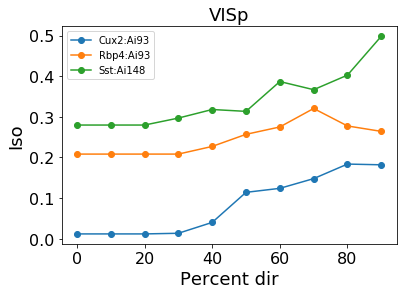

In [247]:
for i in range(3):
    plt.plot(np.arange(0,50,5)*2, iso_mean_dir[:,i], 'o-', label=cres[i])
plt.legend()
plt.title("VISp", fontsize=18)
plt.xlabel("Percent dir", fontsize=18)
plt.ylabel("Iso", fontsize=18)
plt.tick_params(labelsize=16)
# plt.ylim(0,0.45)

In [170]:
for thresh in np.arange(0,50,5):
    print(thresh, cux2[cux2.dir_percent>thresh].iso.mean())

0 0.0119068309260016
5 0.0119068309260016
10 0.0119068309260016
15 0.013491221337628142
20 0.040248797826648725
25 0.11422137971573568
30 0.12405719667950299
35 0.14798648079387827
40 0.183783687704828
45 0.1819704386632113


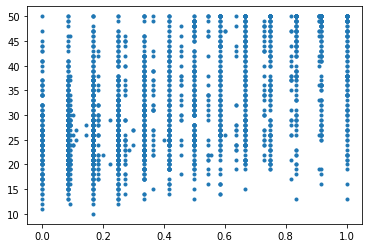

In [171]:
plt.plot(valid.center_percent_trials, valid.dir_percent, '.')

In [172]:
import scipy.stats as st

In [173]:
st.pearsonr(valid.center_percent_trials, valid.dir_percent)

(0.5054782231737378, 2.933008299000931e-159)

In [174]:
valid['cv'] = valid.center_std/valid.center_mean

/Users/saskiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
st.pearsonr(valid.center_percent_trials, valid.cv)

(-0.50456864947343, 1.3318763434095096e-158)

In [176]:
st.pearsonr(valid.dir_percent, valid.cv)

(-0.23454948986353283, 5.225148217190945e-32)

,Unnamed: 0,cell_index,center_dir,center_tf,center_osi,center_dsi,iso,ortho,suppression_strength,suppression_tuning,...,session_id,valid,cre,area,depth,ON,OFF,responsive,rf,cv
473,3,3,1,0,0.124859,0.312349,0.385347,0.079540,0.198617,1.513251,...,1010436210,True,Sst:Ai148,VISp,195,0.959494,0.983400,True,True,0.712398
477,7,7,2,0,0.123083,0.195194,0.043847,-0.388313,-1.044389,-3.256947,...,1010436210,True,Sst:Ai148,VISp,195,0.804407,0.699825,True,True,0.602406
478,8,8,0,0,0.241413,-82.474628,0.422718,0.372417,0.139445,-0.277136,...,1010436210,True,Sst:Ai148,VISp,195,0.682486,0.388449,False,False,0.665544
481,11,11,0,0,0.458332,0.580944,0.869569,0.273849,0.613820,0.941307,...,1010436210,True,Sst:Ai148,VISp,195,1.000000,1.000000,True,True,1.226421
3843,1,1,1,0,0.362343,0.850553,0.641640,0.076163,0.006617,-0.227084,...,989418742,True,Cux2:Ai93,VISp,175,NaN,NaN,True,False,1.301595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,197,197,3,1,0.663449,0.541603,0.922849,0.893405,0.951504,0.017201,...,976474801,True,Cux2:Ai93,VISl,175,0.000000,NaN,True,False,0.427129
3684,202,202,3,1,0.495198,0.593233,-0.648744,0.055708,-2.996156,2.054304,...,976474801,True,Cux2:Ai93,VISl,175,0.994936,0.882048,True,True,1.065391
3685,203,203,0,0,0.197011,0.232490,-0.610871,-0.711703,-2.381871,-0.540945,...,976474801,True,Cux2:Ai93,VISl,175,NaN,NaN,False,False,0.781251
3686,204,204,0,0,0.574982,0.847188,0.858385,0.246167,0.489177,-3.425534,...,976474801,True,Cux2:Ai93,VISl,175,0.671213,NaN,True,False,1.324478


In [197]:
for area in areas:
    for cre in cres:
        print(area, cre, valid[(valid.cre==cre)&(valid.area==area)&
                              (valid.rf)&(valid.center_percent_trials>0.5)].iso.mean())

VISp Cux2:Ai93 0.184115191925161
VISp Rbp4:Ai93 0.29758625135785166
VISp Sst:Ai148 0.36956181646084457
VISl Cux2:Ai93 0.3983416669254129
VISl Rbp4:Ai93 0.3785403659325022
VISl Sst:Ai148 nan
VISal Cux2:Ai93 0.3884915649574554
VISal Rbp4:Ai93 0.7201804585454434
VISal Sst:Ai148 nan


In [213]:
for area in areas:
    for cre in cres:
        print(area, cre, valid[(valid.cre==cre)&(valid.area==area)&
                              (valid.rf)&(valid.cv<1.5)&(valid.center_mean>0.05)].iso.mean())

VISp Cux2:Ai93 0.33323883061522147
VISp Rbp4:Ai93 0.3566230517318474
VISp Sst:Ai148 0.42973457075038307
VISl Cux2:Ai93 0.5620487089682759
VISl Rbp4:Ai93 0.3837041932128697
VISl Sst:Ai148 nan
VISal Cux2:Ai93 0.5686806428549888
VISal Rbp4:Ai93 0.8106851239639091
VISal Sst:Ai148 nan


Text(0, 0.5, 'Std')

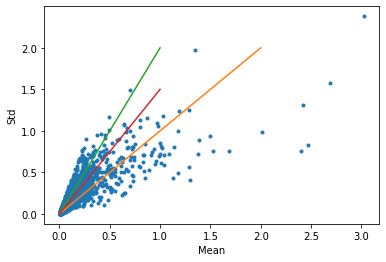

In [215]:
plt.plot(valid.center_mean, valid.center_std, '.')
plt.plot([0,2],[0,2])
plt.plot([0,1],[0,2])
plt.plot([0,1],[0,1.5])
plt.xlabel("Mean")
plt.ylabel("Std")

In [271]:
valid.rf.min()

False

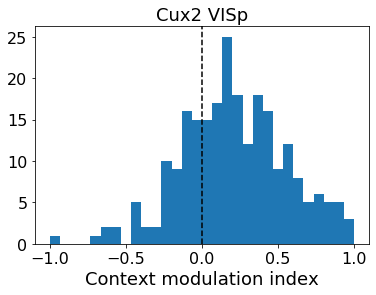

In [272]:
plt.hist(valid[(valid.area=="VISp")&(valid.cre=='Cux2:Ai93')&
               (valid.center_percent_trials>0.25)&(valid.rf)].cmi, bins=30, range=(-1,1));
plt.axvline(x=0, ls='--', color='k')
plt.title("Cux2 VISp", fontsize=18)
plt.xlabel("Context modulation index", fontsize=18)
plt.tick_params(labelsize=16)

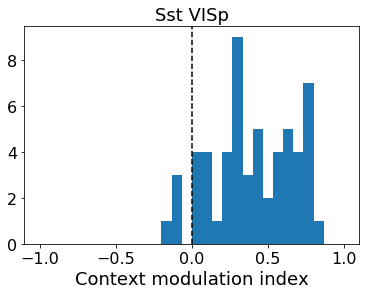

In [273]:
plt.hist(valid[(valid.area=="VISp")&(valid.cre=='Sst:Ai148')&
               (valid.center_percent_trials>0.25)&(valid.rf)].cmi, bins=30, range=(-1,1));
plt.axvline(x=0, ls='--', color='k')
plt.title("Sst VISp", fontsize=18)
plt.xlabel("Context modulation index", fontsize=18)
plt.tick_params(labelsize=16)

In [277]:
valid[(valid.area=="VISp")&(valid.cre=='Sst:Ai148')&
               (valid.center_percent_trials>0.25)&(valid.rf)].iso_mean.mean()

0.09483436004478207

In [278]:
valid[(valid.area=="VISp")&(valid.cre=='Sst:Ai148')&
               (valid.center_percent_trials>0.25)&(valid.rf)].ortho_mean.mean()

0.2694271810709234

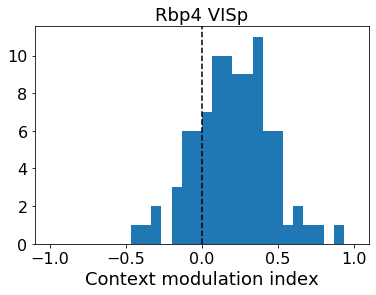

In [274]:
plt.hist(valid[(valid.area=="VISp")&(valid.cre=='Rbp4:Ai93')&
               (valid.center_percent_trials>0.25)&(valid.rf)].cmi, bins=30, range=(-1,1));
plt.axvline(x=0, ls='--', color='k')
plt.title("Rbp4 VISp", fontsize=18)
plt.xlabel("Context modulation index", fontsize=18)
plt.tick_params(labelsize=16)